<a href="https://colab.research.google.com/github/HarshKarumuri/LTV-predictions/blob/main/license_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics opencv-python-headless matplotlib roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 

In [ ]:
!pip install kaggle ultralytics opencv-python-headless matplotlib


In [ ]:
from google.colab import files
files.upload()  # Choose the kaggle.json file from your computer


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshkarumuri","key":"960b324f15afe708d2016ede8176ed48"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download ronakgohil/license-plate-dataset
!unzip license-plate-dataset.zip -d plate_dataset


Dataset URL: https://www.kaggle.com/datasets/ronakgohil/license-plate-dataset
License(s): CC0-1.0
 72% 106M/147M [00:00<00:00, 477MB/s] 
100% 147M/147M [00:00<00:00, 363MB/s]
Archive:  license-plate-dataset.zip
  inflating: plate_dataset/archive/classes.txt  
  inflating: plate_dataset/archive/dataset.yaml  
  inflating: plate_dataset/archive/images/train/0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpg  
  inflating: plate_dataset/archive/images/train/00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-Petrol-Review-Images-Black-Front-Angle.jpg  
  inflating: plate_dataset/archive/images/train/03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.jpg  
  inflating: plate_dataset/archive/images/train/0369b20e-b432-4409-90f9-2420877aa386___8151536c79159a1557421da5f27f9f0e.jpg.jpg  
  inflating: plate_dataset/archive/images/train/07064c2c-2aa3-4419-91a4-92916de8e54c___mahindra-scorpio-old-car-500x500.jpg.jpg  
 

In [ ]:
with open("data.yaml", "w") as f:
    f.write(
        """
path: plate_dataset
train: images
val: images

nc: 1
names: ['license_plate']
        """
    )



In [ ]:
import os

for root, dirs, files in os.walk("/content"):
    for name in dirs:
        print("📁", os.path.join(root, name))


📁 /content/.config
📁 /content/plate_dataset
📁 /content/sample_data
📁 /content/.config/logs
📁 /content/.config/configurations
📁 /content/.config/logs/2025.08.05
📁 /content/plate_dataset/archive
📁 /content/plate_dataset/archive/labels
📁 /content/plate_dataset/archive/images
📁 /content/plate_dataset/archive/labels/val
📁 /content/plate_dataset/archive/labels/train
📁 /content/plate_dataset/archive/images/val
📁 /content/plate_dataset/archive/images/train


In [ ]:
with open("data.yaml", "w") as f:
    f.write(
        """
path: /content/plate_dataset/archive
train: images/train
val: images/val

nc: 1
names: ['license_plate']
        """
    )


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(data="data.yaml", epochs=10, imgsz=640)


Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, p

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 732.7±483.0 MB/s, size: 24.6 KB)


train: Scanning /content/plate_dataset/archive/labels/train... 1526 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1526/1526 [00:01<00:00, 1335.62it/s]

train: /content/plate_dataset/archive/images/train/car-wbs-MH03AR5549_00000.jpg: corrupt JPEG restored and saved
train: New cache created: /content/plate_dataset/archive/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1131.5±200.7 MB/s, size: 162.0 KB)


val: Scanning /content/plate_dataset/archive/labels/val... 169 images, 0 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<00:00, 1777.70it/s]

val: New cache created: /content/plate_dataset/archive/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.9858      2.252      1.006          6        640: 100%|██████████| 96/96 [20:20<00:00, 12.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:40<00:00,  6.71s/it]

                   all        169        169      0.911      0.904      0.936      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9472      1.352     0.9707          6        640: 100%|██████████| 96/96 [20:50<00:00, 13.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:37<00:00,  6.22s/it]

                   all        169        169      0.947      0.955       0.98      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.9244     0.9887     0.9849          6        640: 100%|██████████| 96/96 [20:38<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:41<00:00,  6.86s/it]

                   all        169        169      0.959      0.929      0.967      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.8959     0.7806     0.9698          6        640: 100%|██████████| 96/96 [20:25<00:00, 12.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:36<00:00,  6.16s/it]

                   all        169        169      0.985       0.97      0.989      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.8686     0.6867     0.9431          6        640: 100%|██████████| 96/96 [20:29<00:00, 12.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:40<00:00,  6.75s/it]

                   all        169        169      0.993       0.97       0.99      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.7902     0.5855     0.9195          6        640: 100%|██████████| 96/96 [20:20<00:00, 12.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:38<00:00,  6.38s/it]

                   all        169        169      0.979      0.988      0.992      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.7465     0.5358     0.9042          6        640: 100%|██████████| 96/96 [20:08<00:00, 12.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:35<00:00,  5.95s/it]

                   all        169        169      0.994      0.987      0.994      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      0.708     0.4899      0.887          6        640: 100%|██████████| 96/96 [20:05<00:00, 12.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:36<00:00,  6.09s/it]

                   all        169        169      0.988      0.993      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.6719     0.4608     0.8769          6        640: 100%|██████████| 96/96 [19:49<00:00, 12.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:35<00:00,  5.93s/it]

                   all        169        169      0.994      0.994      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.6317     0.4211     0.8625          6        640: 100%|██████████| 96/96 [19:48<00:00, 12.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:35<00:00,  5.99s/it]

                   all        169        169      0.993      0.994      0.995       0.87



10 epochs completed in 3.489 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:33<00:00,  5.62s/it]


                   all        169        169      0.993      0.994      0.995       0.87
Speed: 1.9ms preprocess, 179.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d970c6b7190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')  # or last.pt


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Blur-license-plates.jpg to Blur-license-plates.jpg


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')  # path to trained weights

# Replace with the exact filename of the uploaded image
results = model('Blur-license-plates.jpg', save=True)



image 1/1 /content/Blur-license-plates.jpg: 384x640 1 license_plate, 186.4ms
Speed: 6.7ms preprocess, 186.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


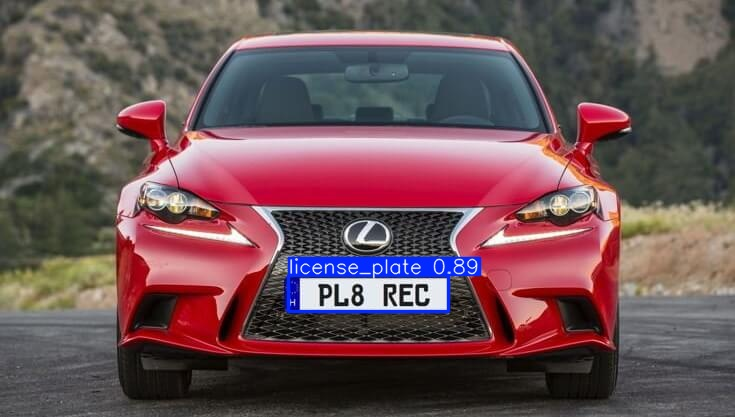

In [ ]:
from IPython.display import Image, display
import os

# Get the path to the latest result image
result_path = os.path.join('/content/runs/detect/predict', os.listdir('/content/runs/detect/predict')[0])
display(Image(filename=result_path))


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 1900-151662242.mp4 to 1900-151662242.mp4
